In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score

In [55]:
df = pd.read_csv("conversion_data.csv")
# df[:10]
df.ix[1:10]

,country,age,new_user,source,total_pages_visited,converted
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0
10,US,38,0,Seo,1,0


In [56]:
df.shape

(316200, 6)

In [57]:
df[df['age'] > 70]


,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
154217,US,73,1,Seo,5,0
192644,US,77,0,Direct,4,0
208969,US,72,1,Direct,4,0
265167,US,79,1,Direct,1,0
295581,UK,111,0,Ads,10,1


In [58]:
df['age'].describe()

count    316200.000000
mean         30.569858
std           8.271802
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max         123.000000
Name: age, dtype: float64

In [59]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [60]:
df[df['age'] > 79]


,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


The age 123 and 111 does not seem  realistic and since these are only two rows, it should have an affect on the analysis so I will remove them.

In [61]:
df_data = df[df['age'] <  80]

In [62]:
df_data.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


In [63]:
df_data.groupby('country').mean()

,age,new_user,total_pages_visited,converted
country,,,,
China,30.672972,0.698520,4.553523,0.001332
Germany,30.442895,0.677288,5.189966,0.062428
UK,30.449875,0.679849,5.082066,0.052612
US,30.566482,0.681985,4.930160,0.037801


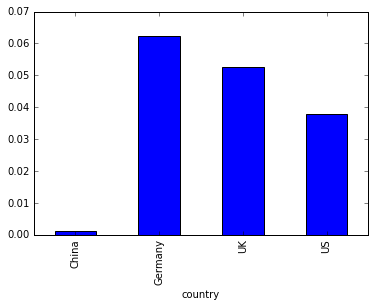

In [64]:
df_data.groupby('country').mean().converted.plot(kind='bar')

China's conversion rate is much lesser than that of the other countries.

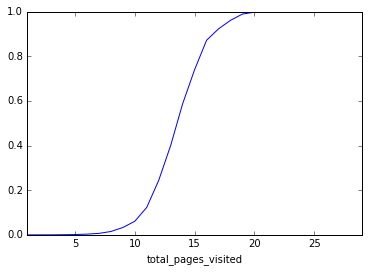

In [65]:
df_data.groupby('total_pages_visited').mean().converted.plot(kind='line')

The conversion rates seems to be directly proportional to the number of pages visited.

In [74]:
dummy_country = pd.get_dummies(df_data['country'], prefix='country')
dummy_source = pd.get_dummies(df_data['source'], prefix='source')
df_data_new = df_data[['age', 'new_user', 'total_pages_visited', 'converted']].join([dummy_country, dummy_source])
# data = data.sample(frac=1).reset_index(drop=True)
df_data_new.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,23,1,5,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,28,1,4,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,39,1,5,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30,1,6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
datatrain=data.ix[:0.7*len(data)]
datatest=data.ix[0.7*len(data):]
Xtrain = datatrain[['age', 'new_user', 'total_pages_visited', 'country_China', 'country_Germany', 'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo']]
ytrain = datatrain[['converted']]
Xtest = datatest[['age', 'new_user', 'total_pages_visited', 'country_China', 'country_Germany', 'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo']]
ytest = datatest[['converted']]
ytrain = np.ravel(ytrain)
ytest=np.ravel(ytest)

In [77]:
train, test = np.split(df_data_new.sample(frac=1), [int(.7*len(df_data_new))])
Xtrain = train[['age', 'new_user', 'total_pages_visited', 'country_China', 'country_Germany', 'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo']]
Ytrain = train[['converted']]
Xtest = test[['age', 'new_user', 'total_pages_visited', 'country_China', 'country_Germany', 'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo']]
Ytest = test[['converted']]

In [78]:
forest = RFC(n_jobs=2,n_estimators=50)
forest.fit(Xtrain, Ytrain)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [82]:
y_pred = forest.predict(Xtest)
accuracy_score(Ytest, y_pred)

0.98444022770398487

The accuracy of the random forest classifier model is 98.44 %